<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep8-9/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scikit-Learn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data
houses = np.loadtxt("/content/drive/MyDrive/Data/houses.txt",delimiter = ',')
Xh = houses[:,:4]
th = houses[:,4]
labels = ["Tamaño","# Habitaciones", "Pisos", "Años"]

In [ ]:
#Ahora tenemos una matriz de 100 filas y 4 columnas
Xh.shape

(100, 4)

In [ ]:
#Normalizamos los datos con Sklearn
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

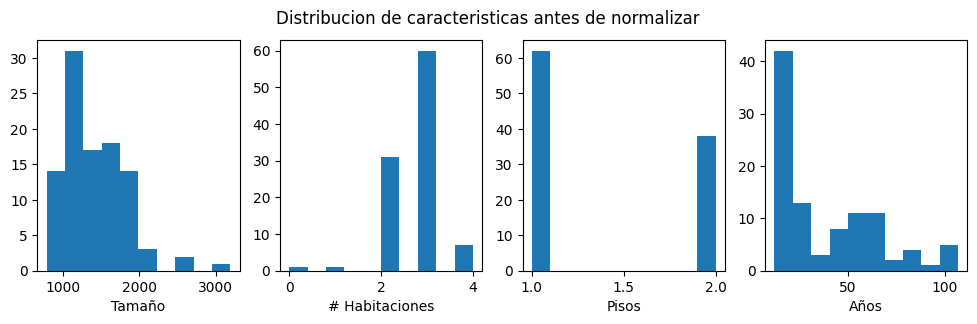

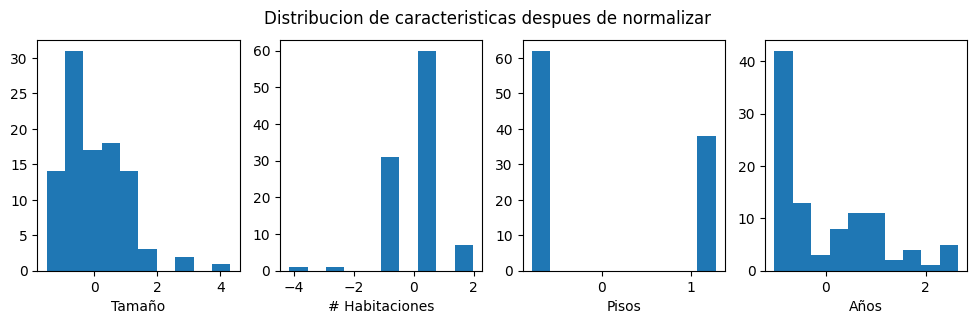

In [38]:
#Ploteamos primero los datos sin normalizar
fig,ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas antes de normalizar")
plt.show()

#Ahora ploteamos los datos normalziados
fig,ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh_norm[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas despues de normalizar")
plt.show()

In [48]:
#Implementamos el metodo Stochastic Gradient Descent a nuestros datos
sgdr = SGDRegressor(max_iter=1000, learning_rate = 'constant', eta0 = 0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
Number of iterations completed: 23, number of weight updates: 2301.0


In [49]:

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters:   w: {w0_norm}, b:{w_norm}")

Model parameters:   w: [361.96529369], b:[110.52234615 -21.75596169 -32.55422132 -38.05995537]
